# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Lucas-Kanade 

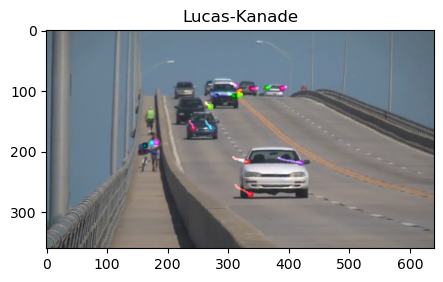

In [37]:
video_path = 'videos/slow_traffic_small.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError(f"Cannot open video: {video_path}")

# Shi-Tomasi corner detection params
feature_params = dict(
    maxCorners=100,
    qualityLevel=0.3,
    minDistance=7,
    blockSize=7
)

# Lucas-Kanade Optical Flow params
lk_params = dict(
    winSize=(15, 15),
    maxLevel=2,
    criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)
)

# Random colors for paths
colors = np.random.randint(0, 255, (100, 3))

# first frame
ret, old_frame = cap.read()
if not ret:
    raise IOError("Cannot read first frame")

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
mask = np.zeros_like(old_frame)

# main loop
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    p1, st, _ = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    if p1 is None:
        break

    # Selecting valid points
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # Drawing the path of movement of points
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = map(int, new.ravel())
        c, d = map(int, old.ravel())
        mask = cv2.line(mask, (a, b), (c, d), colors[i].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 5, colors[i].tolist(), -1)

    # show result
    img = cv2.add(frame, mask)
    cv2.imshow('Optical Flow (LK)', img)
    
    k = cv2.waitKey(30) & 0xFF 
    if k == 27:  
        break
    elif k == ord('s'):
        plt.figure(figsize=[17, 8])
        plt.subplot(131);plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));plt.title("Lucas-Kanade")
        plt.show()
    
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
cv2.destroyAllWindows()


### Dense optical Flow

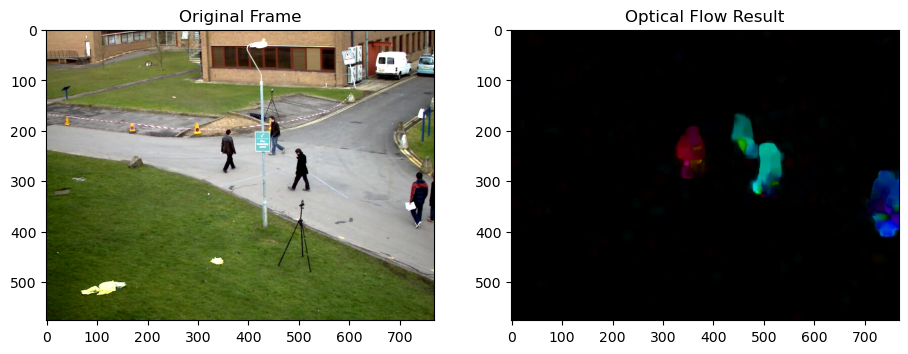

In [38]:
video_path = 'videos/vtest.avi'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError(f"Cannot open video: {video_path}")

ret,frame1 = cap.read()

prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while True:
    ret,frame2 = cap.read()
    if not ret:
        print('Error')
        break
    next_frame = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs,next_frame,None,0.5,3,15,3,5,1.2,0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX) 
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    cv2.imshow('Original Video', frame2)
    cv2.imshow('Optical Flow (Farneback)', bgr)
    k = cv2.waitKey(30) & 0xFF 
    if k == 27:  
        break
    elif k == ord('s'):
        plt.figure(figsize=[17, 8])
        plt.subplot(131);plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB));plt.title("Original Frame")
        plt.subplot(132);plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB));plt.title("Optical Flow Result")
        plt.show()
    prvs = next_frame
cv2.destroyAllWindows()